In [1]:
import requests
import json
import pandas as pd

In [2]:
service = 'https://www.travelpayouts.com/widgets_suggest_params?'
search = input('Ведите откуда и куда летим   ')
link = f'{service}q={search}'


Ведите откуда и куда летим   из москвы в томск


In [3]:
req = requests.get(link)
data = json.loads(req.text)

In [4]:
data

{'origin': {'iata': 'MOW', 'name': 'Москва'},
 'destination': {'iata': 'TOF', 'name': 'Томск'}}

In [5]:
service = 'http://min-prices.aviasales.ru/calendar_preload?'
fromCity = data['origin']['iata']
toCity = data['destination']['iata']
link = f'{service}origin={fromCity}&destination={toCity}&one_way=true'
req = requests.get(link)
data1 = json.loads(req.text)

In [6]:
df = pd.DataFrame(data1['best_prices'], columns=({'depart_date', 'origin',
                                                  'destination', 'distance', 'gate',  'value'}))\
        .rename(columns=({'depart_date': 'Дата вылета',
        'origin':'Из',
        'destination':'В',
        'distance':'Расстояние',
        'gate':'Перевозчик',
        'value':'Стоимость'}))

In [7]:
df['В'] = data['destination']['name']
df['Из'] = data['origin']['name']

In [8]:
df = df[['Дата вылета', 'Из', 'В', 'Стоимость', 'Перевозчик','Расстояние']]

In [16]:
df.head()

,Дата вылета,Из,В,Стоимость,Перевозчик,Расстояние
0,2019-12-20,Москва,Томск,3991.0,Kiwi.com,2880
1,2019-10-19,Москва,Томск,3100.0,Pobeda,2880
2,2020-01-30,Москва,Томск,4632.0,Kiwi.com,2880
3,2019-09-05,Москва,Томск,5600.0,Pobeda,2880
4,2020-01-02,Москва,Томск,7669.0,S7,2880


In [10]:
df.loc[df['Стоимость'] == df['Стоимость'].min()]

,Дата вылета,Из,В,Стоимость,Перевозчик,Расстояние
1,2019-10-19,Москва,Томск,3100.0,Pobeda,2880
7,2019-10-23,Москва,Томск,3100.0,Pobeda,2880
17,2019-10-14,Москва,Томск,3100.0,Pobeda,2880
72,2019-10-15,Москва,Томск,3100.0,Pobeda,2880
76,2019-10-25,Москва,Томск,3100.0,Pobeda,2880
85,2019-10-21,Москва,Томск,3100.0,Pobeda,2880
93,2019-10-20,Москва,Томск,3100.0,Pobeda,2880
95,2019-10-16,Москва,Томск,3100.0,Pobeda,2880
124,2019-10-13,Москва,Томск,3100.0,Pobeda,2880
127,2019-10-17,Москва,Томск,3100.0,Pobeda,2880


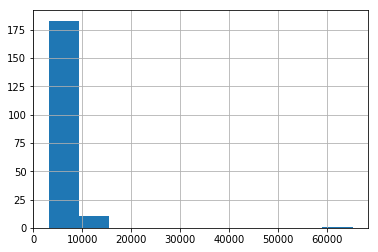

In [13]:
df['Стоимость'].hist();

In [14]:
df.loc[df['Стоимость'] == df['Стоимость'].max()]

,Дата вылета,Из,В,Стоимость,Перевозчик,Расстояние
42,2020-08-01,Москва,Томск,65256.0,Trip.ru,2880
